# Problem-1: PCA analysis Using python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [4]:
 # Creating a sample dataset with features: Height, Weight, Age, and Gender
 data = {
    'Height': [170, 165, 180, 175, 160, 172, 168, 177, 162, 158],
    'Weight': [65, 59, 75, 68, 55, 70, 62, 74, 58, 54],
    'Age':    [30, 25, 35, 28, 22, 32, 27, 33, 24, 21],
    'Gender': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0]  # 1 = Male, 0 = Female
 }

In [5]:
# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)
# Display the dataset
print(df)

   Height  Weight  Age  Gender
0     170      65   30       1
1     165      59   25       0
2     180      75   35       1
3     175      68   28       1
4     160      55   22       0
5     172      70   32       1
6     168      62   27       0
7     177      74   33       1
8     162      58   24       0
9     158      54   21       0


In [7]:
# Separate the features (X) and target (y)
X = df.drop('Gender', axis=1)
y = df['Gender']

In [9]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [12]:
# Split the dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
# Fit logistic regression on the PCA-transformed data
model = LogisticRegression()
model.fit(X_train, y_train)
# Predict on test data
y_pred = model.predict(X_test)

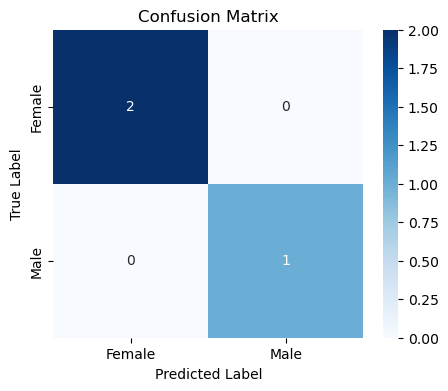

In [13]:
 from sklearn.metrics import confusion_matrix
 import seaborn as sns
 import matplotlib.pyplot as plt
 # Create confusion matrix
 cm = confusion_matrix(y_test, y_pred)
 # Plot confusion matrix
 plt.figure(figsize=(5, 4))
 sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'],yticklabels=["Female","Male"]) 
plt.xlabel('Predicted Label')
 plt.ylabel('True Label')
 plt.title('Confusion Matrix')
 plt.show()

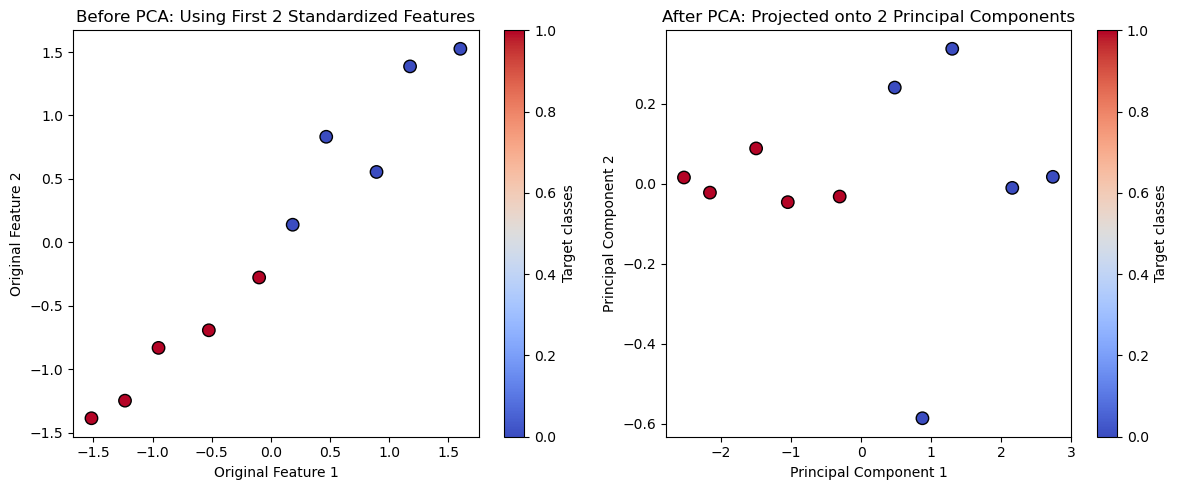

In [14]:
y_numeric = pd.factorize(y)[0]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Original Feature 1')
plt.ylabel('Original Feature 2')
plt.title('Before PCA: Using First 2 Standardized Features')
plt.colorbar(label='Target classes')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('After PCA: Projected onto 2 Principal Components')
plt.colorbar(label='Target classes')

plt.tight_layout()
plt.show()

* Left Plot Before PCA: This shows the original standardized data plotted using the first two features. There is no guarantee of clear separation between classes as these are raw input dimensions.

* Right Plot After PCA: This displays the transformed data using the top 2 principal components. These new components capture the maximum variance often showing better class separation and structure making it easier to analyze or model.